<div style="text-align:center;">
    <img src="64c843ab-901b-45ad-846e-9c35f52dd92f.png" alt="Logotipo de la Empresa" width="250">
</div>
<div style="text-align:center; font-size: 20px; font-weight: bold; color: gray;">
    <H1>PREVENCIÓN Y RESCATE</H1>
    </div>
<div style="text-align:center; font-size: 15px; font-weight: bold; color:gray;">
    <H2>CÓMO LOS SIMULACROS HUBIERAN CAMBIADO LA HISTORIA DEL TITANIC</H2>
</div>
<hr style="margin-bottom: 40px;">

<div style="text-align:center; font-weight:bold; font-size: 24px;">
Presentado por: Luna Outerelo Fernández, gerente de simulacros navales en Safe Seas International S.L.
</div>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

<div style="text-align:center; font-weight:bold; font-size: 27px;">
EDA

<br>

En esta primera etapa, realizaremos un *Análisis exploratorio de datos (EDA)* sobre el conjunto de datos que se me proporcionó, antes de profundizar en análisis más complejos y presentar conclusiones.

<br>

In [156]:
import pandas as pd                             #Importamos las librerias necesarias.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import requests
import streamlit as st
import warnings
warnings.filterwarnings('ignore')
import os
import re
from PIL import Image
from openai import OpenAI
from io import BytesIO
from IPython.display import display
import plotly
import plotly.io as pio
pio.templates.default = "plotly"
from IPython.display import display, HTML


<br>

In [157]:
df = pd.read_csv('titanic.csv')    #Cargamos el dataframe.
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [158]:
df.info()    #Vemos una información preeliminar y general del dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<br>

In [159]:
numero_filas = len(df)    #Observamos el número de filas del dataframe, que en este caso es de 891.
numero_filas

891

In [160]:
duplicados = df.duplicated().sum()    #Comprobamos si hay filas duplicadas.
duplicados

0

In [161]:
df.columns = df.columns.str.strip()   #Eliminamos los espacios en blanco de las columnas.

<br>

In [162]:
valores_nulos = df.isnull().sum()  #Comprobamos si hay valores nulos.
valores_nulos

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [163]:
filas_con_nulos = df.isnull().any(axis=1).sum()    #Comprobamos cuantas filas tienen valores nulos; hay 708 filas con valores nulos de las 891 filas que contiene el Dataset.
filas_con_nulos

708

In [164]:
porcentaje_nulos = (filas_con_nulos / numero_filas)*100    #Como podemos observar, el 79.46% de las filas tienen valores nulos.
print(f"Porcentaje de filas con nulos: {porcentaje_nulos:.2f}%")

Porcentaje de filas con nulos: 79.46%


<br>

<div style="text-align:center; font-weight:bold; font-size: 24px;"> 
Como hemos podido observar anteriormente, hay tres columnas que contienen valores nulos.
 
 'Age',
 'Embarked' y
 'Cabin'.
</div>

<hr style="border: 1px dashed #4DA6FF; WIDTH: 80%; margin: 20px auto;">

<div style="text-align:center; font-weight:bold;">
Tratamiento de la columna 'Age'.
</div>

<br>

In [165]:
df['Age'].mean()    #Calculamos la media de edad de la columna 'Age'.
print(f"""La media de edad de los pasajeros es de {df['Age'].mean():.2f} años.""")

La media de edad de los pasajeros es de 29.70 años.


In [166]:
df['Age'].fillna(df['Age'].mean(), inplace=True)    #Rellenamos los valores nulos de la columna 'Age' con la media de edad.
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [167]:
age_nulos = df['Age'].isnull().sum()    #Comprobamos si quedan valores nulos en la columna 'Age'.
age_nulos

0

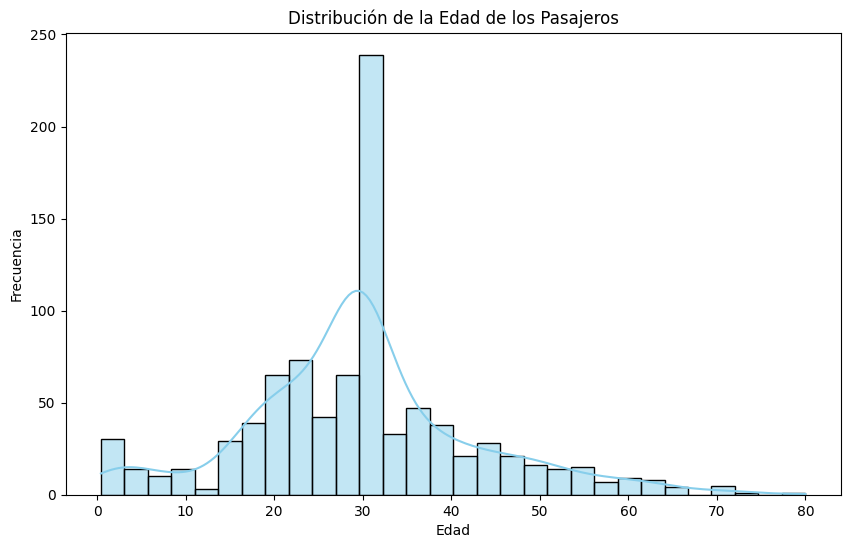

In [168]:
plt.figure(figsize=(10, 6))    #Creamos un gráfico de barras para visualizar la distribución de la edad de los pasajeros.
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de la Edad de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Este gráfico muestra la distribución de la edad de los pasajeros a bordo del Titanic. La mayor parte de los pasajeros se encuentra en el rango de 20 a 40 años, con un pico notable en torno a los 30 años. La distribución es asimétrica hacia la derecha, lo que indica la presencia de pasajeros de mayor edad, aunque en menor frecuencia, esta visualización nos permite entender la composición de edad y cómo pudo haber influido en las probabilidades de supervivencia.

<hr style="border: 1px dashed #4DA6FF; WIDTH: 80%; margin: 20px auto;">

<div style="text-align:center; font-weight:bold;">
Tratamiento de la columna 'Embarked'.
</div>

<br>

In [169]:
moda = df['Embarked'].mode()[0]    #Calculamos la moda de la columna'Embarked'.
print(f"La moda de la columna 'Embarked' es: {moda}")

La moda de la columna 'Embarked' es: S


In [170]:
df['Embarked'].fillna(moda, inplace=True)    #Rellenamos los valores nulos de la columna 'Embarked' con la moda de la columna.
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [171]:
embarked_nulos = df['Embarked'].isnull().sum()    #Comprobamos si quedan valores nulos en la columna 'Embarked'.
embarked_nulos

0

- A continuación, se presenta una gráfica que analiza la relación entre el puerto de embarque y la tasa de supervivencia.

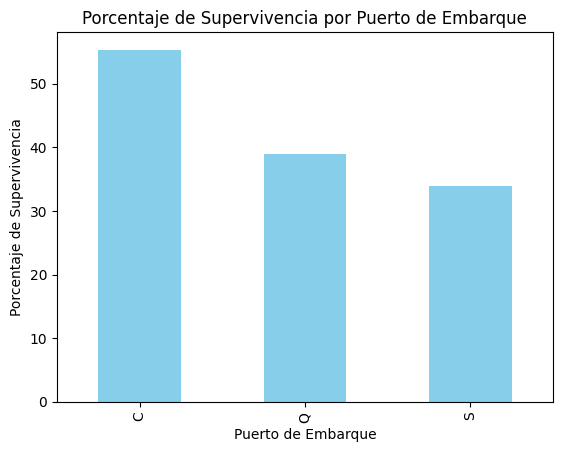

In [172]:
df.columns = df.columns.str.strip()  #Eliminamos los espacios en blanco de las columnas.
survival_by_embarked = df.groupby('Embarked')['Survived'].mean()*100    # Calculamos el porcentaje de supervivencia por puerto de embarque.
survival_by_embarked.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de Supervivencia por Puerto de Embarque')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Porcentaje de Supervivencia')
plt.show()

Esta gráfica nos muestra el **porcentaje de supervivencia en función del puerto de embarque** en el Titanic. Se observa que los pasajeros que embarcaron en el puerto **C** (Cherburgo) tienen una mayor tasa de supervivencia en comparación con los que embarcaron en **Q** (Queenstown) y **S** (Southampton). Este análisis inicial permite identificar posibles patrones de supervivencia relacionados con el punto de embarque, lo que podría estar asociado con la distribución de clases en el barco.

<hr style="border: 1px dashed #4DA6FF; WIDTH: 80%; margin: 20px auto;">

<div style="text-align:center; font-weight:bold;">
Tratamiento de la columna 'Cabin'.
</div>

<br>

In [173]:
df['Cabin'] = df.groupby('Pclass')['Cabin'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Desconocido'))   #Rellenamos los valores nulos de la columna 'Cabin' con la moda de la columna 'Pclass', si no, 'Desconocido'.
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,G6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,D,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,G6,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [174]:
cabin_nulos = df['Cabin'].isnull().sum()    #Comprobamos si quedan valores nulos en la columna 'Cabin'.
cabin_nulos

0

<hr style="border: 1px dashed #4DA6FF; WIDTH: 80%; margin: 20px auto;">

<div style="text-align:center; font-weight:bold;">
Análisis columna 'Fare'.
</div>


- **Análisis de valores atípicos** (outliers): Dadas que algunas tarifas son extremadamente altas, es probable que haya valores atípicos que deban ser analizados.

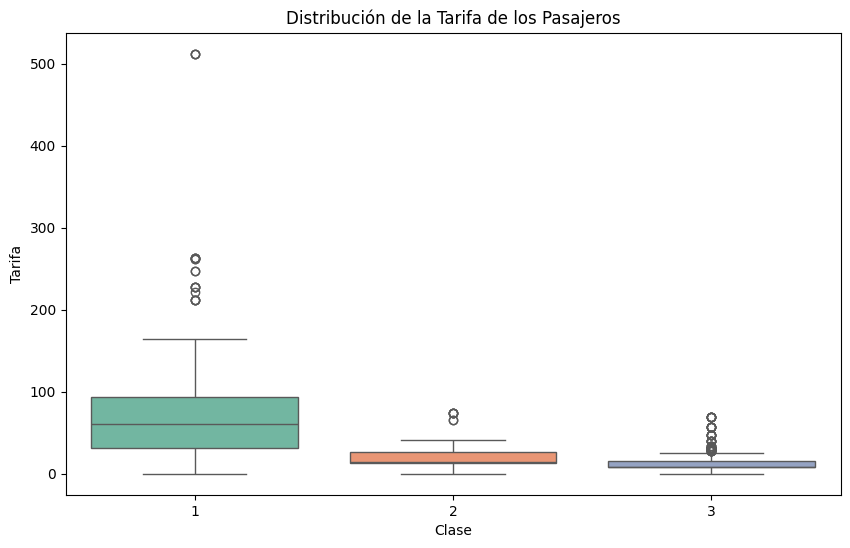

In [175]:
plt.figure(figsize=(10, 6))    #Creamos un gráfico de barras para visualizar la distribución de la tarifa de los pasajeros.
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')
plt.title('Distribución de la Tarifa de los Pasajeros')
plt.xlabel('Clase')
plt.ylabel('Tarifa')
plt.show()

En el gráfico observamos varios *outlier* en las tarifas pagadas por los pasajeros, especialmente en primera clase. Estos valores atípicos representan pasajeros que pagaron tarifas significativamente más altas que el promedio de su clase.

- **Primera clase**: encontramos varios valores atípicos que pagaron más de 200 unidades de tarifa, alcanzando incluso más de 500 unidades.
- **Segunda clase**: aunque hay menos valores atípicos en comparación con la primera, algunos pasajeros pagaron tarifas que superan las 50 unidades.
- **Tercera clase**: también se observan algunos valores atípicos, con pasajeros que pagaron más de 30 unidades.

En este caso, mantendremos los valores atípicos o outliers ya que muestran información real y significativa para analizar patrones específicos que podrían afectar a las conclusiones finales, como la relación entre riqueza y supervivencia.

<br>

In [176]:
outliers_ricos = df[df['Fare'] > 200]
supervivencia_outliers_ricos = outliers_ricos['Survived'].mean() * 100    #Calculamos el porcentaje de supervivencia de los pasajeros con tarifas superiores a 200.
print(f"El porcentaje de supervivencia de los pasajeros con tarifas superiores a 200 es de: {supervivencia_outliers_ricos:.2f}%")

El porcentaje de supervivencia de los pasajeros con tarifas superiores a 200 es de: 70.00%


<hr style="border: 1px dashed #4DA6FF; WIDTH: 80%; margin: 20px auto;">

<div style="text-align:center; font-weight:bold;">
Tratamiento columna 'Survived'.
</div>

In [177]:
print(df['Survived'].unique())   #Comprobamos los valores únicos de la columna 'Survived'.

[0 1]


In [178]:
df['Survived'] = df['Survived'].map({0: 'No', 1: 'Sí'})    #Cambiamos los valores de la columna 'Survived' por 'Sí' y 'No'.

In [179]:
df['Survived'].fillna(0, inplace=True)    #Rellenamos los valores nulos de la columna 'Survived' con 'No'.

<hr style="border: 1px dashed #4DA6FF; WIDTH: 80%; margin: 20px auto;">

<div style="text-align:center; font-weight:bold;">
Análisis de correlación.
</div>

El análisis de correlación nos permite evaluar la relación entre diferentes variables numéricas del dataset. Es fundamental identificar posibles relaciones entre la clase, el precio del boleto, la edad de los pasajeros y su probabilidad de supervivencia. Esto nos dará una idea de qué factores tuvieron mayor peso en la probabilidad de supervivencia.

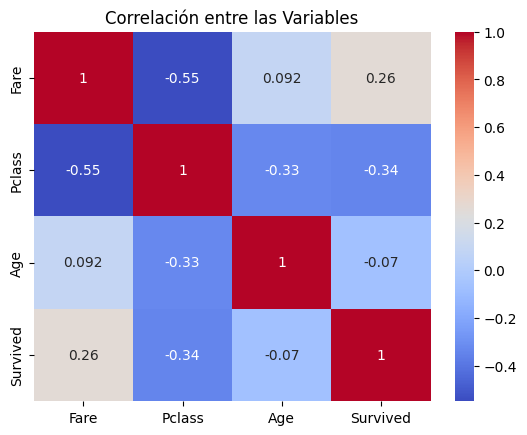

In [180]:
df['Survived'] = df['Survived'].map({'No': 0, 'Sí': 1})  # Convertimos la columna 'Survived' a valores numéricos.
correlacion = df[['Fare', 'Pclass', 'Age', 'Survived']].corr()    # Calculamos la correlación entre las variables 'Fare', 'Pclass', 'Age' y 'Survived'.
sns.heatmap(correlacion, annot=True, cmap='coolwarm')     # Creamos un mapa de calor para visualizar la correlación.
plt.title('Correlación entre las Variables')
plt.show()

Este heatmap muestra las correlaciones entre variables clave del Titanic. Destaca que las tarifas más altas están relacionadas con una mayor supervivencia y clases sociales superiores. Además, se observa una tendencia negativa entre clase social y supervivencia, indicando que los pasajeros de clase alta tenían más probabilidades de sobrevivir. Este análisis sugiere cómo la estructura social y el poder adquisitivo influyeron en el desenlace de los pasajeros.

<hr style="border: 1px dashed #4DA6FF; WIDTH: 80%; margin: 20px auto;">

<div style="text-align:center; font-weight:bold;">
Análisis de la dispersión de tarifas por clase.
</div>

Queremos explorar cómo se distribuyen las tarifas en función de la clase de los pasajeros. La clase social en la que viajaban afectaba directamente en el precio del boleto, y por ende, su acceso a recursos como los botes salvavidas.

Esto nos permitirá entender las diferencias económicas entre las clases y cómo esto puedo influir en la capacidad de los pasajeros para sobrevivir. Además, es relevante analizar si las personas que pagaron más tuvieron mejores condiciones para salvarse.

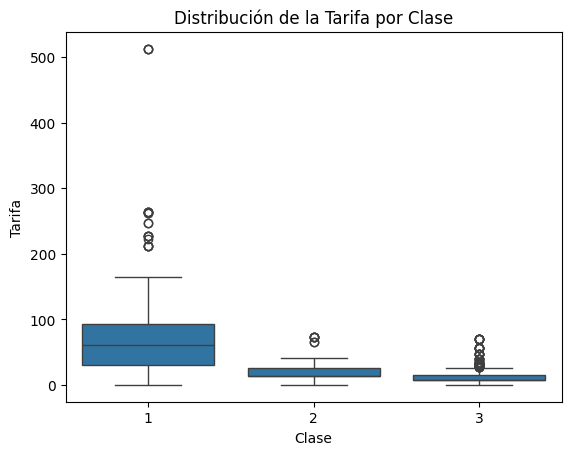

In [181]:
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Distribución de la Tarifa por Clase')
plt.xlabel('Clase')
plt.ylabel('Tarifa')
plt.show()

El gráfico por cajas muestra la dispersión de tarifas pagadas en cada clase. Las personas en primera clase pagaron tarifas mucho más altas, como era de esperar. Esto puede haberles otorgado un acceso más rapidpo a los recursos de emergencia.

<hr style="border: 1px dashed #4DA6FF; WIDTH: 80%; margin: 20px auto;">

<div style="text-align:center; font-weight:bold;">
Análisis entre sexo y clase social.
</div>

Como gerente de simulacros navales, para mí es importante entender cómo las diferentes variables afectan las oportunidades de evacuación, así que un análisis de la interacción entre sexo y clase social es clave.

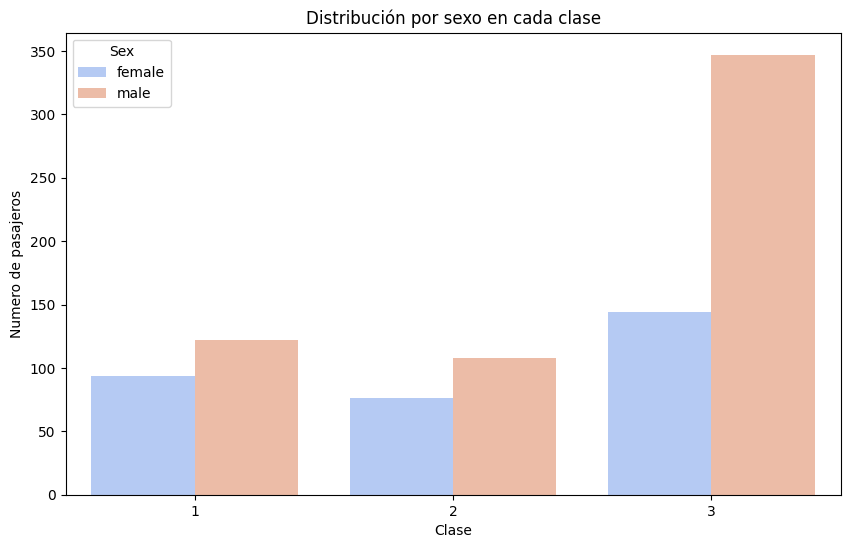

In [182]:
plt.figure(figsize=(10, 6))    #Creamos un gráfico de barras para visualizar la distribución de la tarifa de los pasajeros.
sns.countplot(x='Pclass', hue='Sex', data=df, palette='coolwarm')
plt.title('Distribución por sexo en cada clase')
plt.xlabel('Clase')
plt.ylabel('Numero de pasajeros')
plt.show()

Esta gráfica representa la distribución de género en cada clase social a bordo del Titanic. Se observa que en todas las clases hay una mayor cantidad de hombres que de mujeres, especialmente en tercera clase, donde el número de hombres es significativamente alto. Este tipo de análisis nos ayuda a entender la composición demográfica del barco y puede pproporcionar contexto adicional al analizar las tasas de supervivencia y el acceso a recursos de evacuación.

<hr style="border: 1px dashed #4DA6FF; WIDTH: 80%; margin: 20px auto;">

<div style="text-align:center; font-weight:bold;">
Conclusión final del EDA.
</div>

El análisis exploratorio nos permitió comprender las principales características y relaciones en el dataset del Titanic. Comenzamos limpiando y preparando los datos, gestionando valores nulos y utilizando estrategias como la media y la moda para completar la información faltante en algunas columnas clave. Al examinar las variables principales, descubrimos una relación significativa entre el costo del boleto y la clase social, lo que a su vez influyó en la probabilidad de supervivencia. La correlación negativa entre la clase social y la supervivencia refuerza cómo los pasajeros de primera clase, con mejores ubicaciones y acceso a los botes, tuvieron mayores probabilidades de sobrevivir. Este análisis inicial sienta las bases para investigar más a fondo cómo factores como el poder adquisitivo y la ubicación a bordo afectaron el destino de los pasajeros.

<br>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

<br>

<div style="text-align:center; font-size: 15px; font-weight: bold; color:gray;">
    <H2>CÓMO LOS SIMULACROS HUBIERAN CAMBIADO LA HISTORIA DEL TITANIC</H2>
</div>

Tras realizar un análisis exploratorio de los datos (EDA) sobre el desastre del Titanic, voy a pasar a enfocarme en el tema que he elegido para un análisis más profundo: *la importancia de los simulacros de evacuación y cómo estos podrían haber afectado a la supervivencia*.

Como gerente de *Safe Seas International*, una empresa dedicada a la simulación de evacuaciones y seguridad en el mar, es mi deber subrayar la importancia de los simulacros de evacuación en situaciones de emergencia y de intentar, mediante este proyecto, concienciar de la importancia de los mismos.
El trágico hundimiento del Titanic es un claro ejemplo de lo que sucede cuando la preparación falla, y aún más, cuando se 'pierde' la oportunidad de realizar un simulacro que podría haber salvado muchas más vidas. El Titanic zarpó el 14 de abril de 1912, y curiosamente, en esa misma mañana en la que estaba programado un simulacro de evacuación, este fue cancelado sin motivo aparente. Si se hubiera llevado a cabo dicho simulacro, la tripulación y los pasajeros habrían estado mejor preparados para reaccionar ante una emergencia real, optimizando el uso de los botes salvavidas y evitando la confusión y el caos.

En este análisis, desde Safe Seas International, vamos a centrarnos en demostrar el impacto de la cancelación de este simulacro a través de los siguientes puntos clave:

- *Uso ineficiente de los botes salvavidas*: Analizaremos los datos que muestran que muchos botes partieron con una capacidad muy inferior a la máxima permitida.

- *Clase social y acceso a los botes salvavidas*: Analizaremos como dicha falta de preparación afectó de manera desproporcionada a los pasajeros de tercera clase, ubicados más lejos de los botes, y como un simulacro hubiera dado una oportunidad más justa de supervivencia para todos los pasajeros.

- *Impacto de la fractura y su forma en la supervivencia*: Evaluaremos por último si la forma en la que el Titanic se partió en dos tuvo un impacto en la capacidad de evacuación.

<br>

<div style="text-align:center; font-weight:bold; font-size: 24px;">
Botes salvavidas
</div>

<br>

El Titanic, conocido como el 'barco insumergible' (valga la redundancia), zarpó como he comentado anteriormente, el 14 de abril de 1912, chocando contra un iceberg a las 23:40h, comenzando así su hundimiento en las gélidas aguas del Atlántico Norte. La esperanza para los más de 2200 pasajeros a bordo era acceder a los *botes salvavidas*, que representaban la única vía de escape en una época en la que no existían tecnologías avanzadas de rescate ni helicopteros de salvamento.

Algo que llama mucho la atención, dado su gran tamaño y sofisticación, es que el Titanic sólo llevaba 20 *botes salvavidas*, lo que daría respaldo a unas 1178 personas, es decir, poco más de la mitad de las personas a bordo. Esta falta significativa en el número de botes se debía a una mezcla de factores; las obsoletas regulaciones navales de la época, la absurda creencia en la robusted del barco y la desafortunada y errónea idea de que en caso de emergencia, el Titanic enviaría señales de socorro y recibiría ayuda rápidamente.

Veamos los *botes salvavidas* al detalle:

El titanic tenía tres tipos de *botes salvavidas*:

- 14 botes de madera grandes, con capacidad para 65 personas cada uno. Eran los botes principales.
- 2 botes de emergencia o de rescate rápido, con capacidad para 40 personas cada uno. Estos eran más pequeños y estaban diseñados para ser utilizados en situaciones rápidas de emergencia.
- 4 botes plegables (Engelhardt), con capacidad para 47 personas cada uno. Eran botes de lona, más ligeros, diseñados para ser utilizados como último recurso.

Distribución física de los botes:

- Estribor (lado derecho) y babor (lado izquierdo).
- Cubiertas superiores (A y B).

<div style="text-align:center;">
    <img src="botes.jpg" alt="Mi imagen" width="700">
    <p>La imagen muestra los botes salvavidas de madera del Titanic, un tipo de bote rígido diseñado para emergencias marítimas.</p>
    </div>


<br>

### Resumen de eventos claves:

- 11:40 p.m (14 abril): El Titanic choca contra un iceberg.
- 12:05 a.m (15 abril): Se envía la primera señal de socorro (SOS). Aún sin orden de evacuar.
- 12:25 a.m (15 abril): El capitán ordena preparar los primeros botes salvavidas y comienza la evacuación.
- 12:40 a.m (15 abril): El bote 7, el primer bote, es lanzado.
- 02:20 a.m (15 abril): El Titanic se parte en dos y se hunde completamente.

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

<div style="text-align:center; font-weight:bold; font-size: 24px;">
Gráfica 1: Orden de salida, hora de lanzamiento y capacidad de los botes salvavidas.
</div>

<br>

In [183]:
data = {
    "Bote n.º": ["7", "5", "3", "8", "1", "6", "16", "14", "12", "4", "2", "10", "9", "11", "A", "D", "B", "C"],
    "Tipo": ["Bote de madera"]*14 + ["Plegable"]*4,
    "Capacidad máxima": [65]*14 + [47]*4,
    "Personas a bordo": [12, 25, 32, 33, 41, 28, 28, 39, 56, 55, 70, 40, 64, 60, 12, 30, 35, 35]
}
df_botes = pd.DataFrame(data)
df_botes['Hora de lanzamiento (min)'] = [40, 43, 50, 55, 60, 70, 80, 90, 105, 115, 120, 125, 130, 132, 135, 140, 145, 150]
fig = px.scatter(
    df_botes,
    x='Bote n.º',
    y='Hora de lanzamiento (min)',
    size='Personas a bordo',
    color='Tipo',
    hover_name='Bote n.º',
    hover_data={'Hora de lanzamiento (min)': True, 'Personas a bordo': True, 'Capacidad máxima': True},
    labels={'Hora de lanzamiento (min)': 'Hora de lanzamiento (minutos desde las 12:00)'},
    title='Orden de lanzamiento de los botes salvavidas del Titanic'
)
fig.update_traces(marker=dict(symbol='circle', line=dict(width=2)))
fig.update_layout(
    xaxis_title='Número del bote',
    yaxis_title='Hora de lanzamiento (minutos desde las 12:00)',
    yaxis=dict(tickmode='linear', tick0=40, dtick=10),
    xaxis=dict(tickvals=list(range(1, 17)) + ['A', 'B', 'C', 'D']),
    height=600,
    width=900,
)
fig


<br>

En este gráfico podemos observar el orden de lanzamiento de los botes del Titanic según el tiempo transcurrido desde la medianoche del 15 de abril de 1912, cuando se comenzó la evacuación.
Los puntos reflejan los distintos botes, mientras que el tamaño de los mismos indica la cantidad de personas a bordo.

**Elementos clave:**

- *Eje X*: Número de los botes salvavidas.
- *Eje y*: Minutos transcurridos a partir de las 12.00 a.m.
- *Tamaño del punto*: Refleja la cantidad de personas que abordan cada bote.

**Observaciones:**

En la gráfica vemos que los primeros botes lanzados fueron los de madera, partiendo el primer bote (que fué el bote n.º 7) pasados 40 minutos de la medianoche. También nos muestra cómo los botes plegables fueron los últimos que se lanzaron, ya que eran más inestables y estaban indicados para ser utilizados como última opción. También podemos observar que en su totalidad se utilizan 18 de los 20 botes disponibles, ya que los botes plegables (bote A y B) quedaron flotando boca abajo después de que el Titanic se hunidera.

Se puede observar claramente la mala gestión en la capacidad de los botes, viendo como el primer bote parte con sólo 12 personas de las 65 que cabían. Podemos ver como los botes lanzados más al final si consiguieron albergar un númeor mayor de personas, aunque sólo el bote número 2 partió con más personas de las que cabían.

También podemos observar el tiempo de respuesta, que fue más tardío de lo ideal, y el tiempo que transcurrió entre el lanzamiento de cada bote, en el cual hubo una diferencia significativa entre alguno de ellos, reflejando la falta de coordinación y la incertidumbre.


<br>

In [184]:
tiempos_lanzamiento = [40, 43, 50, 55, 60, 70, 80, 90, 105, 115, 120, 125, 130, 132, 135, 140, 145, 150] 
diferencias = np.diff(tiempos_lanzamiento)    #Calculamos las diferencias entre los tiempos de lanzamiento.
media_diferencias = np.mean(diferencias)    #Calculamos la media de las diferencias.
print(f"La media del tiempo transcurrido entre el lanzamiento de los botes es: {media_diferencias:.2f} minutos")

La media del tiempo transcurrido entre el lanzamiento de los botes es: 6.47 minutos


Como podemos observar, la media del tiempo entre bote y bote es de 6.47 minutos. Sin embargo, los minutos que pasaron entre el lanzamiento de un bote a otro fueron muy dispares. Por ejemplo, entre el lanzamiento del bote 12 al 4 transcurrieron 15 minutos, lo que sugiere que, aunque la media de lanzamiento es relativamente frecuente, en realidad hubo momentos en los que los intervalos fueron significativamente más largos.

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

<div style="text-align:center; font-weight:bold; font-size: 24px;">
Gráfica 2: Comparación entre la capacidad máxima y el número de personas a bordo en los botes salvavidas del Titanic.
</div>

<br>

In [185]:
data = {
    "Bote n.º": ["7", "5", "3", "8", "1", "6", "16", "14", "12", "4", "2", "10", "9", "11", "A", "D", "B", "C"],
    "Tipo": ["Bote de madera"]*14 + ["Plegable"]*4,
    "Capacidad máxima": [65]*14 + [47]*4,
    "Personas a bordo": [12, 25, 32, 33, 41, 28, 28, 39, 56, 55, 70, 40, 64, 60, 12, 30, 35, 35]
}
df_botes = pd.DataFrame(data)    

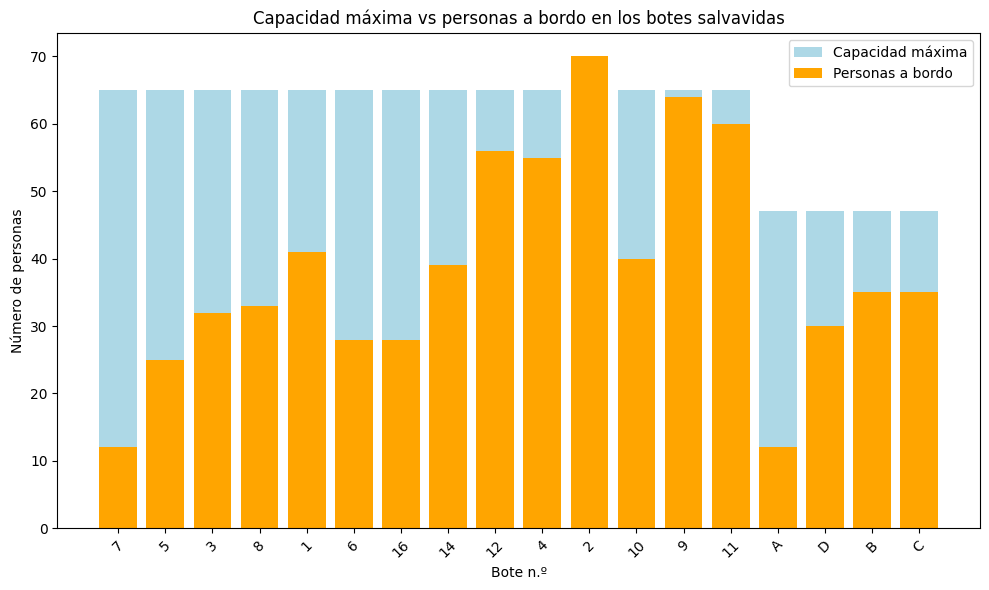

In [186]:
plt.figure(figsize=(10, 6))
plt.bar(df_botes['Bote n.º'], df_botes['Capacidad máxima'], color='lightblue', label='Capacidad máxima')
plt.bar(df_botes['Bote n.º'], df_botes['Personas a bordo'], color='orange', label='Personas a bordo')
plt.xlabel('Bote n.º')
plt.ylabel('Número de personas')
plt.title('Capacidad máxima vs personas a bordo en los botes salvavidas')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Este gráfico ilustra la capacidad máxima frente al número de personas a bordo en cada bote. Cada barra representa un bote, donde en la parte azul claro indica el total de capacidad del bote, y en la parte naranja la cantidad de personas que efectivamente iban a bordo de dicho bote.

**Elementos clave**:

- *Eje x*: Número de bote.
- *Eje y*: Número de personas.
- *Colores*: El color naranja representa las personas a bordo y el azul la capacidad total.

**Observaciones**:

Podemos observar un claro desperdicio de capacidad, acentuado sobre todo en los primeros botes lanzados, reflejando una vez más la falta de conocimiento de evacuación. Sólo botes como el 2 o el 12 sí se llenaron completamente. 

En resumen, esta gráfica es una representación visual poderosa de cómo la falta de simulacros y una evacuación caótica llevaron a que los botes salvavidas se lanzaran sin aprovechar todo su espacio, lo que resultó en una trágica pérdida de vidas.

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

<div style="text-align:center; font-weight:bold; font-size: 24px;">
Gráfica 3: Análisis de la ubicación de los botes en relación con las clases sociales y la probabilidad de supervivencia.
</div>

<br>

In [187]:
clases = ["Primera Clase", "Segunda Clase", "Tercera Clase"]      #Creamos un diccionario con las clases y las cubiertas correspondientes.
cubiertas = {'Primera Clase': 1, 'Segunda Clase': 2, 'Tercera Clase': 3}    #Creamos un dataframe con las clases y las cubiertas correspondientes.
df_simulacion = pd.DataFrame(clases, columns=['Clase'])     
df_simulacion['Cubierta'] = df_simulacion['Clase'].map(cubiertas)     #Mostramos el dataframe.
print(df_simulacion)

           Clase  Cubierta
0  Primera Clase         1
1  Segunda Clase         2
2  Tercera Clase         3


Este análisis es clave para comprender las desigualdades de oportunidades en la evacuación, y cómo las condiciones a bordo del barco afectaron a la probabilidad de sobrevivir. 

El Titanic fue diseñado con una clara separación jerárquica entre las clases sociales, lo que tambien afectó a su acceso a los botes salvavidas. Esta separación, además de las diferencias entre las cubiertas donde se encontraban los pasajeros, jugó un papel decisivo en las probabilidades.

**Hipótesis**:

- *Pasajeros de primera clase*: Se presume que tuvieron acceso más rapido y directo a los botes salvavidas, ya que sus camarotes estaban ubicados en las cubiertas superiores, cerca a los puntos de evacuación.

- *Pasajeros de segunda clase*: Ocupaban una posición intermedia en términos de acceso a los botes. Sus camarotes se encontraban en cubiertas intermedias, lo que, aunque no tan ventajoso como la primera clase, les otorgaba mejores probabilidades que a los de tercera clase.

- *Pasajeros de tercera clase*: En su mayoría, estos pasajeros estaban en las cubiertas inferiores, lejos de los botes salvavidas, lo que les supuso una desventaja significativa para llegar a tiempo durante la evacuación.

**Puntos a considerar para este análisis**:

- *Clase social*.
- *Ubicación física de los botes*.
- *Tasa de supervivencia por clase*.
- *Diferencia de acceso a los botes*.

<div style="text-align:center;">
    <img src="1200px-Titanic_lifeboats_on_boat_deck_plan.jpg" alt="Mi imagen" width="1000">
    <p>La imagen en plano muestra la localización de las cubiertas.</p>
    </div>

<br>

<div style="text-align:center; font-weight:bold;">
Comenzaremos analizando la tasa de supervivencia por clase social.
</div>

<br>

In [188]:
supervivencia_por_clase = df.groupby('Pclass')['Survived'].mean() *100
supervivencia_por_clase = supervivencia_por_clase.round(2)
supervivencia_por_clase

Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64

In [189]:
df_barplot = df.groupby(['Pclass', 'Survived']).size().reset_index(name='Count')   #Creamos un dataframe con la cantidad de personas que sobrevivieron y no sobrevivieron por clase.
df_barplot['Survived'] = df_barplot['Survived'].map({0: 'No sobrevivió', 1: 'Sobrevivió'})   #Convertimos la columna 'Survived' a string.
fig= px.bar(       #Creamos un gráfico de barras con Plotly Express.
    df_barplot,
    x='Pclass',
    y='Count',
    color='Survived',
    barmode='stack',
    labels={'Pclass': 'Clase social', 'Count': 'Número de personas'},
    color_discrete_map={'No sobrevivió': 'red', 'Sobrevivió': 'green'},
    title='Supervivencia por Clase Social en el Titanic',
    text='Count'
)
fig.update_traces(marker=dict(line=dict(width=2, color='black')), texttemplate='%{text}', textposition='outside')     #Añadimos un borde a las barras y texto en el exterior.
fig.update_layout(                                                                                                     #Actualizamos el layout del gráfico.
    xaxis_title='Clase social',
    yaxis_title='Número de personas',
    height=600,
    width=800,
    bargap=0.1,
    hovermode='x'
)
fig

<br>

Esta gráfica muestra claramente cómo la clase social afectó a las probabilidades de supervivencia en el Titanic. Podemos observar varias tendencias importantes:

- **Primera clase**: En la primera barra (clase 1), podemos ver que la proporción de supervivientes es mayor en comparación con los que no sobrevivieron. Esto respalda la hipótesis de que los pasajeros de primera clase tenían más acceso a los botes salvavidas, lo que les brindó mayores oportunidades de supervivencia. De las 216 personas que conformaban la primera clase, 136 sobrevivieron, lo que representa un porcentaje significativo.

- **Segunda clase**: En la segunda barra (clase 2), la proporción de personas que sobrevivieron es menor que la primera clase, pero aún así es bastante equilibrada. Esto sugiere que los pasajeros de segunda clase también tenían un acceso razonable a los botes salvavidas, aunque no tanto lógicamente como los de primera clase. De 184 personas, 87 lograron sobrevivir.

- **Tercera clase**: En la tercera barra (clase 3) muestra un panorama drásticamente diferente. La mayoría de los pasajeros en tercera clase no sobrevivieron. Este gráfico resalta una gran disparidad, ya que de 491 pasajeros de tercera clase, sólo 119 sobrevivieron. Esto refuerza la idea de que los pasajeros de tercera clase, ubicados en las cubiertas inferiores, enfrentaron grandes dificultades para acceder a los botes salvavidas, lo que redujo drásticamente sus probabilidades de supervivencia.

**Conclusión:**

Este gráfico subraya la desigualdad en las oportunidades de supervivencia, con una clara desventaja para los pasajeros de la tercera clase. La ubicación física en el barco y la priorización en la evacuación jugaron un papel crucial en la tasa de supervivencia.

<br>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

<div style="text-align:center; font-weight:bold; font-size: 24px;">
Gráfica 4: Comparación entre el tiempo de acceso a los botes salvavidas y la supervivencia según la clase social en el Titanic.
</div>

<br>

In [190]:
clases = ["Primera Clase", "Segunda Clase", "Tercera Clase"]      #Creamos un diccionario con las clases y las cubiertas correspondientes.
cubiertas = {'Primera Clase': 1, 'Segunda Clase': 2, 'Tercera Clase': 3}    #Creamos un dataframe con las clases y las cubiertas correspondientes.
df_simulacion = pd.DataFrame(clases, columns=['Clase'])     
df_simulacion['Cubierta'] = df_simulacion['Clase'].map(cubiertas)     #Mostramos el dataframe.
print(df_simulacion)

           Clase  Cubierta
0  Primera Clase         1
1  Segunda Clase         2
2  Tercera Clase         3


<div style="text-align:center;">
    <img src="producto-plan-titanic-b120083.jpg" alt="Mi imagen" width="600">
    <p>Diagrama del Titanic que muestra la profundidad de las cubiertas.</p>
    </div>

<br>

Vamos a crear una función (estimar_tiempo) para simular el tiempo que cada clase habría necesitado para llegar a los botes en función de su ubicación dentro del Titanic y posibles obstáculos..

<br>

In [191]:
def estimar_tiempo(cubierta, tiempo_base_por_cubierta=3, obstaculos_adicionales=2):   #Función para estimar el tiempo en minutos basado en la cubierta y obstáculos.
    """
    Estima el tiempo en minutos basado en la cubierta y obstáculos.
    - tiempo_base_por_cubierta: tiempo que toma moverse entre cubiertas.
    - obstaculos_adicionales: tiempo adicional por obstáculos, podría variar entree clases.
    """
    tiempo_base = cubierta * tiempo_base_por_cubierta     #Calculamos el tiempo base.
    tiempo_total = tiempo_base + obstaculos_adicionales    #Calculamos el tiempo total.
    return tiempo_total                                    #Retornamos el tiempo total.
df_simulacion['Tiempo estimado (min)'] = df_simulacion['Cubierta'].apply(estimar_tiempo)     #Aplicamos la función a la columna 'Cubierta'.
print(df_simulacion)

           Clase  Cubierta  Tiempo estimado (min)
0  Primera Clase         1                      5
1  Segunda Clase         2                      8
2  Tercera Clase         3                     11


In [192]:
clases = ["Primera Clase", "Segunda Clase", "Tercera Clase"]
tiempo_a_botes_minutos = [5, 8, 11] # Tiempo en minutos que tardaron en llegar a los botes
supervivencia_por_clase = [63, 47, 24] # Porcentaje de supervivencia por clase

fig = go.Figure()  # Creamos un gráfico de barras apiladas
fig.add_trace(go.Bar(
    x=clases,
    y=tiempo_a_botes_minutos,
    name='Tiempo a los Botes (minutos)',
    marker_color='lightblue',
    text=tiempo_a_botes_minutos,
    textposition='outside',   
    hovertemplate='Clase: %{x}<br>Tiempo a los Botes: %{y} minutos',
))

fig.add_trace(go.Bar(       #Añadimos una segunda barra.
    x=clases,
    y=supervivencia_por_clase,
    name='Supervivencia (%)',
    marker_color='lightgreen',
    text=supervivencia_por_clase,
    textposition='auto',
    hovertemplate='Clase: %{x}<br>Porcentaje de Supervivencia: %{y}%',
))

fig.update_layout(        #Actualizamos el layout.
    barmode='group',
    title='Comparación: Tiempo estimado a los botes vs Supervivencia por clase social',
    xaxis_title='Clase',
    yaxis_title='Valores',
    height=600,
    width=900,
    template='plotly_white',
    legend_title='Categoría',
)

fig.show()

<br>

Este gráfico ilustra una comparación crítica entre el tiempo estimado que los pasajeros de diferentes clases, habrían tardado en llegar a los botes, y cómo este tiempo podría haber influido en sus tasas de supervivencia. El Titanic presentaba una segregación clara en la disposición física de los pasajeros, con los de primera clase situados más cerca de las cubiertas superiores, donde se encontraban los botes salvavidas. Los pasajeros de tercera clase, ubicados en las cubiertas inferiores, tenían que recorrer distancias mayores y encontrar su camino a través de corredores complejos, lo que pudo haber contribuido a su baja tasa de supervivencia.

**Elementos clave**:

- *Las barras azul claro* muestran el tiempo estimado, en minutos, que los pasajeros de cada clase tardaron en llegar a los botes.
- *Las barras verdes* representan la tasa de supervivencia de cada clase en porcentaje.

**Conclusión:**

La clase social tuvo un impacto profundo en las posibilidades de supervivencia durante el hundimiento del Titanic. Los pasajeros de Primera clase, al estar más cerca de los botes y enfrentar menos obstáculos, tuvieron una mayor tasa de supervivencia, mientras que los de tercera clase, con más barreras físicas y menos acceso, sufrieron las consecuencias más graves. Esto refuerza la importancia de un acceso equitativo y adecuado a los recursos de emergencia en situaciones críticas.




<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

<div style="text-align:center; font-weight:bold; font-size: 24px;">
Reflexión sobre la relación entre clase social y acceso prioritario en emergencias.
</div>

<br>

Desde la perspectiva de **Safe Seas International**, como empresa comprometida en la seguridad en situaciones de emergencia, el análisis de los eventos del Ttitanic nos deja lecciones valiosas que aún resuenan hoy en día. El acceso desigual a los botes salvavidas, determinado en gran medida por la ubicación física de los pasajeros en función de su clase social, refleja una realidad que no solo fue crítica en 1912, sino que sigue siendo relevante en las operaciones de evacuación actuales. 

<div style="overflow: auto;">
<img src="519e4695-e318-45f2-9956-9afe59f6ae54.png" style="float: left; margin-right: 15px; width: 300px;">
<p>


El Titanic, con sus cubiertas superiores ocupadas por pasajeros de primera clase, quienes tuvieron acceso más rápido a los botes, y las cubiertas inferiores destinadas a la tercera clase, nos muestra cómo la desigualdad en el diseño y la plainificación puede influir en la probabilidad de supervivencia en una emergencia. Los pasajeros de tercera clase no sólo tuvieron más obstáculos físicos para llegar a los botes, sino que también enfrentaron barreras estructurales que redujeron sus oportunidades de salvación. 

Esta situación nos plantea una reflexión profunda: **¿sigue siendo cierto hoy en día que pagar más por un billete en una clase superior otorga ventajas no solo en comodidad, sino también en seguridad durante situaciones de emergencia?** Aunque la normativa actual ha evolucionado, el diseño de los sistemas de evacuación en aviones, barcos y trenes sigue reflejando, en muchos casos, un acceso preferencial para las clases superiores.

En **Safe Seas International**, creemos firmemente que la seguridad debe estar por encima de cualquier distinción de clase. Los simulacros de emergencia que diseñamos y ejecutamos buscan garantizar que todos, sin importar su ubicación o estatus, tengan las mismas oportunidades de sobrevivir en una situación crítica. Nuestra misión es corregir las lecciones del pasado, asegurando que en el futuro **todos los pasajeros puedan evacuar de manera rápida y eficiente, sin importar su clase o posición en el barco**.

Esta reflexión nos recuerda que la seguridad no debe ser un privilegio de unos pocos, sino un derecho de todos, y como líderes en simulacros navales, trabajamos diariamente para hacer realidad esa visión.

</p>
</div>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

<div style="text-align:center; font-weight:bold; font-size: 24px;">
Generación de imágenes del proyecto con AI.
</div>

In [193]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Reemplaza esto con tu clave API y tu URL
api_key = ''
endpoint = ''

# Prompt de texto que quieres convertir en imagen
prompt = ""

# Encabezados necesarios para hacer la petición
headers = {
    'Content-Type': 'application/json',
    'api-key': api_key,
}

# Cuerpo de la solicitud
data = {
    "prompt": prompt,
    "n": 1,
    "size": "1024x1024"
}

# Realiza la solicitud a la API
response = requests.post(endpoint, json=data, headers=headers)

# Verifica si la solicitud fue exitosa
if response.status_code == 200:
    response_data = response.json()
    # Obtén la URL de la imagen generada
    image_url = response_data['data'][0]['url']
    
    # Descargar la imagen desde la URL
    image_response = requests.get(image_url)
    
    # Mostrar la imagen en el notebook
    img = Image.open(BytesIO(image_response.content))
    plt.imshow(img)
    plt.axis('off')  # Ocultar los ejes
    plt.show()
else:
    print(f"Error: {response.status_code}")
    print(response.json())


MissingSchema: Invalid URL '': No scheme supplied. Perhaps you meant https://?

<br>

<div style="text-align:center; font-weight:bold; font-size: 24px;">
Buscador de imágenes reales.
</div>

<br>

In [ ]:
import requests
from IPython.display import Image, display

# Clave API y punto de conexión
subscription_key = ""  # Reemplaza con tu clave API de Bing
endpoint = ""

# Función para buscar imágenes y mostrarlas
def buscar_imagen_bing(query):
    headers = {"Ocp-Apim-Subscription-Key": subscription_key}
    params = {"q": query, "count": 1}  # Buscar solo 1 imagen
    response = requests.get(endpoint, headers=headers, params=params)
    
    if response.status_code == 200:
        resultado = response.json()
        if resultado["value"]:
            image_url = resultado['value'][0]['contentUrl']
            print(f"Imagen encontrada: {image_url}")
            display(Image(url=image_url))  # Mostrar la imagen en el notebook
        else:
            print("No se encontraron imágenes para esa búsqueda.")
    else:
        print(f"Error: {response.status_code}")

# Ejemplo de uso
consulta = ""
buscar_imagen_bing(consulta)

<br>

<hr style="border: 1px solid gray; width:80%; margin: 20px auto;">

<br>

<div style="text-align:center; font-weight:bold; font-size: 24px;">
Conclusión final del proyecto: "Prevención y rescate: Cómo los simulacros hubieran cambiado la historia del Titanic".
</div>

<br>

Este proyecto ha sido una inmersión detallada en el análisis del desastre del Titanic, enfocado no solo en la exploración de datos, sino también en la evacuación de factores cruciales como en la distribución de los botes salvavidas y la implementación (o falta de) simulacros de emergencia. Nuestro objetivo ha sido imaginar cómo un enfoque preventivo, basado en simulacros y planificación adecuada, podría haber cambiado radicalmente el diseño de esta tragedia.

A través del análisis exploratorio de datos (EDA) y el desarollo de diversas visualizaciones, logramos destacar varios aspectos clave:

- **1. Importancia de los simulacros y la preparación:** 


El Titanic, a pesar de ser una de las embarcaciones más lujosas de su tiempo, no estaba preparado para un evento de evacuación. Nuestro análisis demostró que una simple organización y práctica de simulacros habría cambiado la forma en la que tanto pasajeros como tripulación reaccionaron durante el hundimiento. Los datos sugieren que la falta de un simulacro la mañana del 14 de abril contribuyó al caos y la desorganización en el momento crítico.

- **2. Distribución y lanzamiento de botes salvavidas:**


Analizamos el orden de lanzamiento, la capacidad y el llenado de los botes salvavidas. Las visualizaciones dejaron en claro que muchos botes partieron con menos ocupación de la que permitía su capacidad, especialmente los primeros lanzados. Un programa de simulacros y entrenamiento adecuado habría asegurado que los botes fueran ocupados.

- **3. Inequidad en el acceso a los recursos de emergencia:**


Nuestro análisis evidencia desigualdades significativas entre clases sociales y género en cuanto a las oportunidades de evacuación. Los pasajeros de primera clase tenían ubicaciones más accesibles hacia los botes y mayores probabilidades de sobrevivir, mientras que aquellos en tercera clase estaban esencialmente más alejados y enfrentaron mayores obstáculos para llegar a los puntos de evacuación. Esto subraya la importancia de diseñar simulacros inclusivos y accesibles para todos, independientemente de su ubicación a bordo.

- **4. Conclusiones para la seguridad marítima moderna:**


Este análisis ofrece lecciones aplicables para la seguridad marítima actual. Si bien hoy en día se exige el uso de simulacros de emergencia antes de zarpar, los aprendizajes de esta investigación refuerzan la necesidad de actualizar y optimizar continuamente estas prácticas. Es fundamental que los simulacros se diseñen no solo como ejercicios obligatorios, sino como estrategias de prevención que sean claras y comprensibles para todos los ocupantes de la embarcación.

<br>

En **Safe Seas International**, creemos firmemente que el conocimiento del pasado, apoyado en el análisis de datos y una profunda comprensión de las fallas estructurales y operativas, es la mejor guía para la seguridad futura. Este proyecto nos muestra que los simulacros y protocolos de evacuación no son un mero formalismo, sino un salvavidas potencial que debe tomarse con la seguridad y el rigor necesarios. A medida que avanzamos en el diseño de simulacros y protocolos de evacuación efectivos, llevamos estas lecciones con nosotros para proteger y salvar vidas.

Este análisis conluye reafirmando nuestro compromiso en **Safe Seas International**: la seguridad de cada persona a bordo es la prioridad, y nuestro objetivo es anticipar y prevenir tragedias mediante una preparación exahustiva y equitativa.

<br>

<div style="text-align:center;">
    <img src="1a783ccd-ec9f-4b45-b9a5-3beea9a6eaa1.png" alt="Mi imagen" width="400">
    <p>SAFE SEAS INTERNATIONAL S.L.</p>
    </div>